# Kernel SVM Tutorial

## Introduction

Kernel SVM extends the capabilities of linear SVMs to handle non-linear relationships between features by transforming the input data into a higher-dimensional space where a linear separator might exist. This approach uses kernel functions to compute the inner products of data points in the transformed space without explicitly performing the transformation.

## 1. Understanding the Kernel Trick

The kernel trick revolves around replacing the inner product in the SVM formulation with a kernel function. This allows the algorithm to operate in a higher-dimensional feature space without the need to compute the coordinates of the data in that space, thus avoiding the curse of dimensionality.

### 1.1 Kernel Functions

A kernel function, $k(\mathbf{x}, \mathbf{x'})$, computes the inner product of two vectors $\mathbf{x}$ and $\mathbf{x'}$ in some (potentially very high-dimensional) feature space.

**Common Kernel Functions:**

1. **Linear Kernel:**
   $$
   k(\mathbf{x}, \mathbf{x'}) = \mathbf{x} \cdot \mathbf{x'}
   $$
2. **Polynomial Kernel:**
   $$
   k(\mathbf{x}, \mathbf{x'}) = (\gamma \mathbf{x} \cdot \mathbf{x'} + r)^d
   $$
3. **Radial Basis Function (RBF) Kernel:**
   $$
   k(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma \|\mathbf{x} - \mathbf{x'}\|^2)
   $$
4. **Sigmoid Kernel:**
   $$
   k(\mathbf{x}, \mathbf{x'}) = \tanh(\gamma \mathbf{x} \cdot \mathbf{x'} + r)
   $$

Where $\gamma$, $r$, and $d$ are parameters that can be tuned according to the data.

### 1.2 Mathematical Formulation with Kernels

In the dual form of the SVM, the objective function and the constraints remain the same, but the inner product $(\mathbf{x}_i \cdot \mathbf{x}_j)$ is replaced by the kernel function $k(\mathbf{x}_i, \mathbf{x}_j)$:

**Dual Objective with Kernel:**
$$
\max_{\alpha} \left\{ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n y_i y_j \alpha_i \alpha_j k(\mathbf{x}_i, \mathbf{x}_j) \right\}
$$

**Subject to:**
$$
\sum_{i=1}^n \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

## 2. Derivation and Implementation

### 2.1 Optimization Problem

The optimization problem in Kernel SVM is to maximize the dual objective subject to the constraints provided. The solution involves selecting a set of $\alpha_i$ values that satisfy the constraints.

### 2.2 Decision Function

The decision function for new points $\mathbf{x}$, using the support vectors, is given by:

$$
f(\mathbf{x}) = \text{sgn}\left(\sum_{i=1}^n \alpha_i y_i k(\mathbf{x}_i, \mathbf{x}) + b\right)
$$

Where $b$ is the bias, which can be computed from the support vectors that lie on the margin.

## 3. Practical Considerations

### 3.1 Choosing the Right Kernel

The choice of kernel and its parameters (like $\gamma$ in RBF) can have a significant impact on the model's performance. Cross-validation is often used to determine the best kernel and parameter values.

### 3.2 Computational Complexity

While Kernel SVM can handle nonlinear data, it is computationally intensive, especially as the number of training examples increases. Therefore, it's crucial to balance model complexity and training set size.

## Conclusion

Kernel SVM is a powerful extension of SVM that allows for the classification of data that is not linearly separable by implicitly mapping input features into higher-dimensional spaces. Understanding the underlying mathematics helps in effectively applying this method to complex classification tasks.


# In-depth Kernel SVM Tutorial

## Introduction

Kernel SVM extends the Support Vector Machine to non-linear classifications by employing kernel functions. This approach allows SVMs to operate in a transformed feature space without explicitly computing the transformation.

## 1. Mathematical Foundations of Kernel SVM

### 1.1 Kernel Functions and Their Properties

Kernel functions enable the SVM algorithm to operate in a high-dimensional feature space without directly computing the transformations. A kernel function $k(\mathbf{x}, \mathbf{x'})$ must satisfy the conditions of being a valid kernel:

1. **Symmetry:**
   $$
   k(\mathbf{x}, \mathbf{x'}) = k(\mathbf{x'}, \mathbf{x})
   $$

2. **Positive Semi-definiteness:**
   For any set of points and any coefficients $c_i$, the following must hold:
   $$
   \sum_{i,j} c_i c_j k(\mathbf{x}_i, \mathbf{x}_j) \geq 0
   $$
   This ensures that the kernel matrix (Gram matrix) is positive semi-definite, which is essential for optimization stability.

### 1.2 Primal Problem Formulation

In its basic form, the primal problem for SVM (without the kernel trick) aims to find a decision boundary that maximizes the margin between two classes. The primal formulation with the incorporation of kernel functions isn't commonly used directly because it involves explicit mappings to high-dimensional spaces, which defies the purpose of the kernel trick.

### 1.3 Dual Problem Formulation

The dual formulation leverages kernel functions and is more commonly used because it avoids direct computation in the high-dimensional space.

**Dual Objective:**
$$
\max_{\alpha} \left\{ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n y_i y_j \alpha_i \alpha_j k(\mathbf{x}_i, \mathbf{x}_j) \right\}
$$

**Subject to:**
$$
\sum_{i=1}^n \alpha_i y_i = 0
$$
$$
0 \leq \alpha_i \leq C, \quad \forall i
$$

### 1.4 Karush-Kuhn-Tucker (KKT) Conditions

The KKT conditions are necessary for optimality in constrained optimization problems like the SVM. For the Kernel SVM, these conditions are:

1. **Stationarity:**
   $$
   \mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
   $$

2. **Primal feasibility:**
   $$
   y_i (\sum_{j=1}^n \alpha_j y_j k(\mathbf{x}_i, \mathbf{x}_j) + b) \geq 1 - \xi_i
   $$

3. **Dual feasibility:**
   $$
   \alpha_i \geq 0
   $$

4. **Complementary slackness:**
   $$
   \alpha_i [1 - \xi_i - y_i (\sum_{j=1}^n \alpha_j y_j k(\mathbf{x}_i, \mathbf{x}_j) + b)] = 0
   $$

5. **Slack variable conditions:**
   $$
   \xi_i \geq 0, \quad \alpha_i (C - \xi_i) = 0
   $$

## 2. Decision Function

The decision function, which determines the class of a new point $\mathbf{x}$, is given by:

$$
f(\mathbf{x}) = \text{sgn}\left(\sum_{i=1}^n \alpha_i y_i k(\mathbf{x}_i, \mathbf{x}) + b\right)
$$

Where $\alpha_i$ are the Lagrange multipliers obtained from solving the dual problem, and $b$ is the bias, computed from the support vectors.

## Conclusion

Understanding the mathematical derivation of Kernel SVM, including the use of kernel functions and the optimization through the dual problem, provides a robust foundation for applying this powerful method in non-linear classification tasks. The ability to choose and validate appropriate kernel functions is crucial for the success of SVM models in various applications.


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



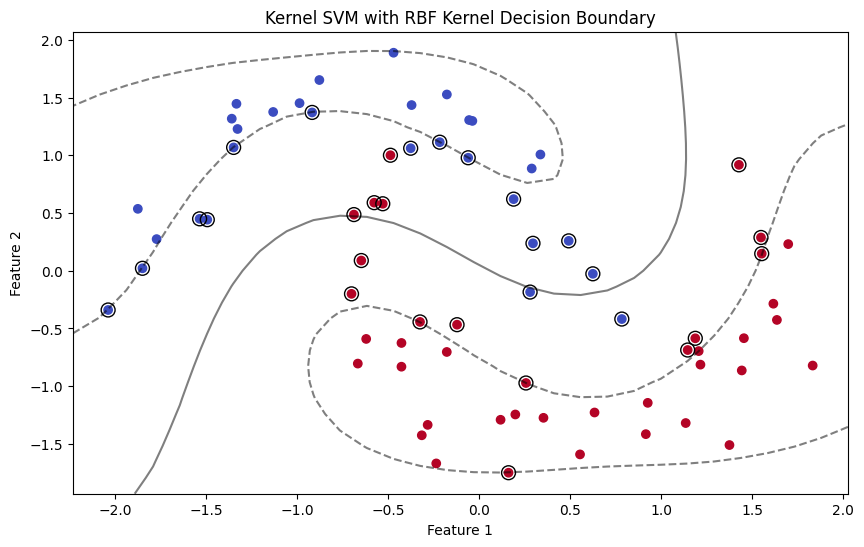

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Generate synthetic data
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data to have mean zero and variance one
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model using the Radial Basis Function (RBF) kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_clf.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = svm_clf.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Plotting decision boundary
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Visualize the data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plot_svc_decision_function(svm_clf)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kernel SVM with RBF Kernel Decision Boundary')
plt.show()
